### 데이터 준비
```
$ mkdir -p ~/aiffel/stock_prediction/data
$ wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
$ wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
$ mv daily-min-temperatures.csv airline-passengers.csv ~/aiffel/stock_prediction/data

```

# 시계열 예측
- Dataset 1: Daily Minimum Temperatures in Melbourne 
- Dataset 2: International Airline Passengers

## Time Seires 생성 및 시계열 데이터 안정성 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
df = pd.read_csv(dataset_filepath, index_col="Date", parse_dates=True) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
# Series 객체 
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

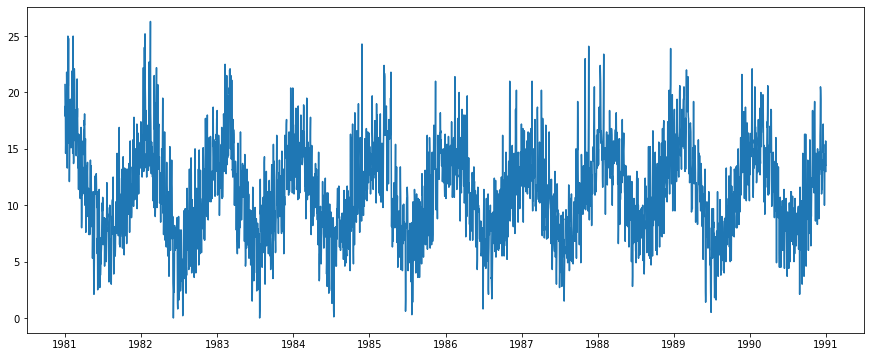

In [10]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6 # matlab 차트의 기본 크기를 15, 6으로 지정

plt.plot(ts1)

In [11]:
# 결측치 유무 확인, 결측치가 있으면 결측치 부분만 Series로 출력
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

In [12]:
# 결측치가 있다면 보간하기 위한 방법 (time 기준)
ts1 = ts1.interpolate(method = 'time')
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

In [13]:
# 일정 시간내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수
# 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean() # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()
    original = plt.plot(timeseries,color='blue',label="Original")
    mean = plt.plot(rolmean, color='red', label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Std")
    plt.show(block=False)

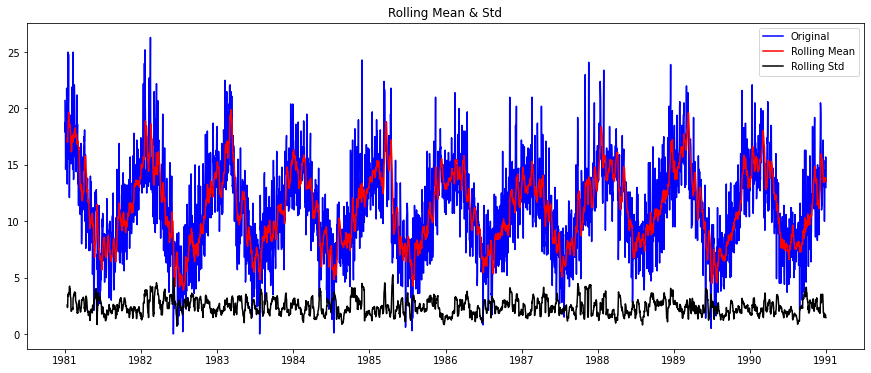

In [14]:
plot_rolling_statistics(ts1, window=12)

In [15]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<class 'pandas.core.series.Series'>


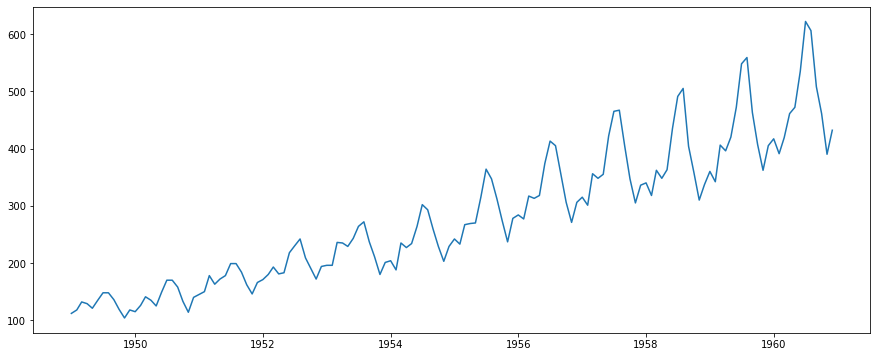

In [17]:
ts2 = df['Passengers']
print(type(ts2))
plt.plot(ts2)

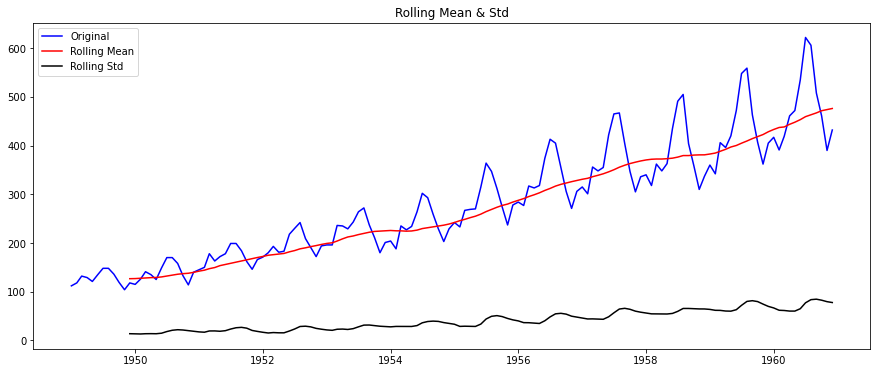

In [18]:
plot_rolling_statistics(ts2,window=12)

# 시계열 데이터 안정성 통계적 테스트

[Dickey-Fuller 단위근 검정](https://datascienceschool.net/view-notebook/ebb638fc880145b9adeef8dfa630f067/)

### 가설 검정 
- 통계적인 추측의 한 방법. 가설의 합당성 여부를 판정하는 것
- 귀무가설 (Null Hypothesis) : 가치 없는 가설, 틀렸다고 예측하는 가설, 연구자가 부정하고자 하는 가설
- 대립가설 (연구가설) : 귀무가설에 대립하는 명제, 연구자가 주장하고자 하는 가설, 귀무가설을 기각 함으로써 받아들여지는 반증의 과정
- [참고](https://blog.naver.com/0723sjp/222019343173)

### 유의 확률 (P value)
![p-value](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile30.uf.tistory.com%2Fimage%2F994B64345B5401C1057A84)
- (1) t-test라고 할 때, t 분포가 있음
- (2) 유의수준 (alpha)에 해당하는 value(임계치)가 있음
- (3) 우리가 검정하고자 하는 데이터에서 샘플 데이터를 추출함 => 표본평균, 표본 표준편차
- (4) 귀무 가설이 참(true)라고 전제했을 때의 평균 => 모평균
- (5) 검정 통계량 : 가설을 검정하기 위한 기준으로 사용하는 값
![test](https://t1.daumcdn.net/cfile/tistory/217ABA3858D9CB502E)
- (6) p-value : 자유도를 고려했을 때, 검정통계량에 대한 확률
![f-p](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F9907E3375B5401D60FBFF2)
    - 자유도 : x 값이 가질 수 있는 값의 범위 (자유도 = 표본수 - 1)
    - P value > 0.05 일 때, 귀무가설을 채택 (대립가설을 입증하는 증거가 불충분함)
    - P value < 0.05 일 때, 대립가설을 채택 (실험자의 주장이 0.95 이상의 확률로 맞다)
- [참고](https://kkokkilkon.tistory.com/36)

```python
$ pip install statsmodels 
# statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지
```

In [22]:
from statsmodels.tsa.stattools import adfuller
# Augemented Dickey-Fuller Test : 시계열 데이터 분포

In [23]:
def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [24]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [25]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


H0 : 시계열이 안정적이지 않다

ts1 일 때 p-value < 0.05, 시계열이 안정적이지 않다는 걸 기각함 = 시계열이 안정적이다.

ts2 일 때 p-value > 0.05, 시계열이 안정적이지 않다는 걸 기각하지 못함 = 시계열이 안정적이지 않을 수 있다.

## 안정적이지 않은 시계열 데이터를 안정적인 시계열로 바꾸기
- International airplane passengers data 의 시계열적 특징 : 분산이 점점 커짐. 평균이 점점 커짐
- 방법 1: 기존의 시계열 데이터를 가공/변형 (정성적 분석을 통해 stationary 특성 강조 방법 찾기)
- 방법 2: 시계열 분해(Time series decomposition)

### 로그함수 - 분산 상쇄하기

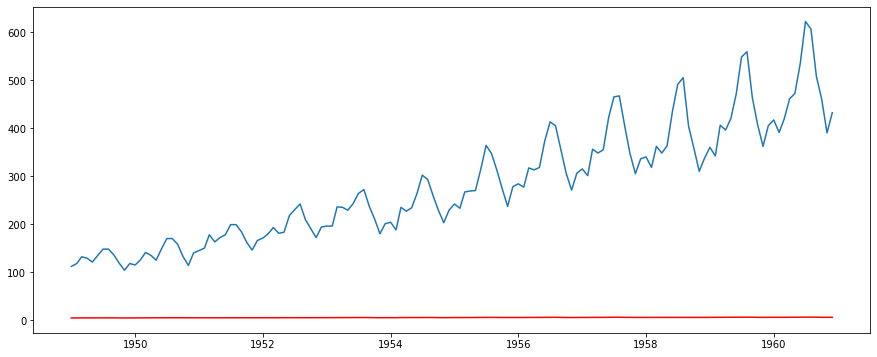

In [45]:
# 로그함수 변환 : 시간 추이에 따라 분산이 점점 커지고 있을 때 로그함수로 변환
ts_log = np.log(ts2)
plt.plot(ts2)
plt.plot(ts_log, color="red") # 원래 데이터와 비교

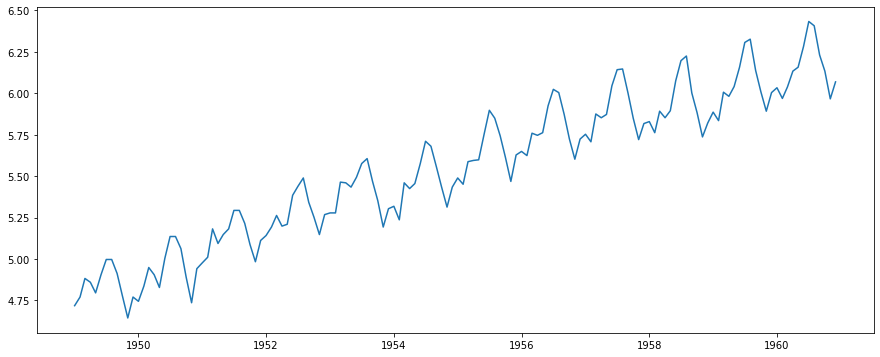

In [50]:
plt.plot(ts_log) #로그함수로 변환해준 데이터만 봤을 때, 분산이 줄어든 느낌

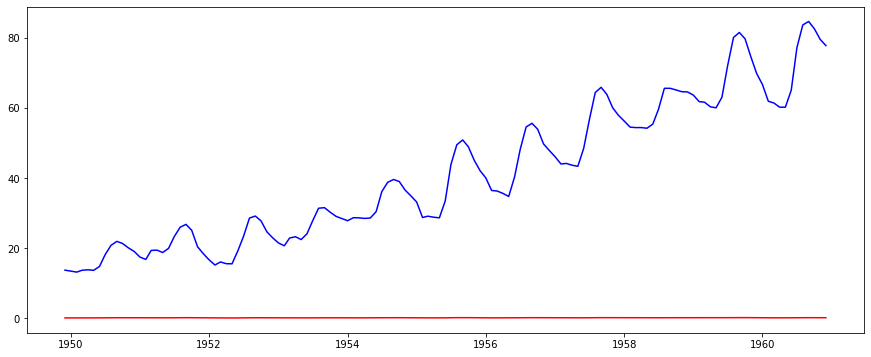

In [51]:
#분산 확인
original_std = ts2.rolling(window=12).std()
changed_std = ts_log.rolling(window=12).std()
plt.plot(original_std, color="blue")
plt.plot(changed_std, color="red") # 바뀐 후의 분산은 0에 가깝다

In [30]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.99에서 0.42로 절반 가량 줄어들었다.

### Moving average 제거 - 트렌드 상쇄

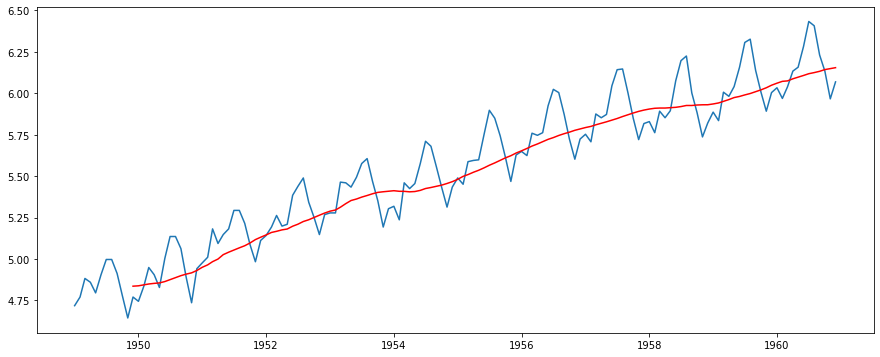

In [31]:
## Moving average 제거 : 트렌드(시간 추이에 따라 나타나는 평균값 변화) 상쇄하기
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color="red")

In [52]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

window size가 12인 경우, 앞의 11개 데이터에서는 Moving average가 계산되지 않으므로 NaN이 발생한다. => Dicky-Fuller Test 시 에러가 발생할 수 있으므로, 데이터셋에서 제거해야 함

In [53]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

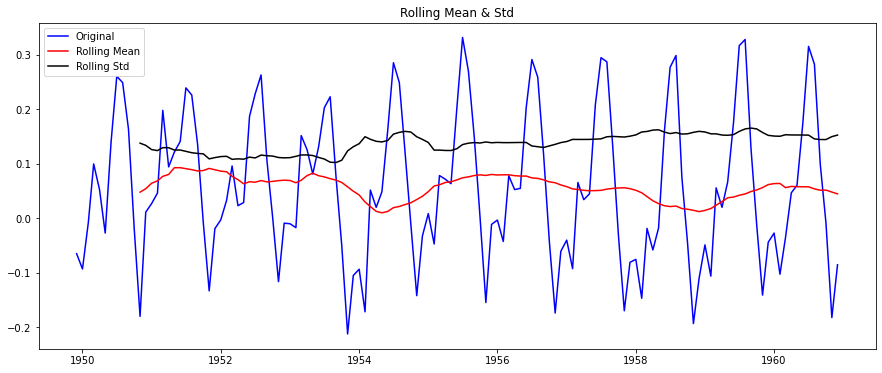

In [54]:
plot_rolling_statistics(ts_log_moving_avg)

In [55]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


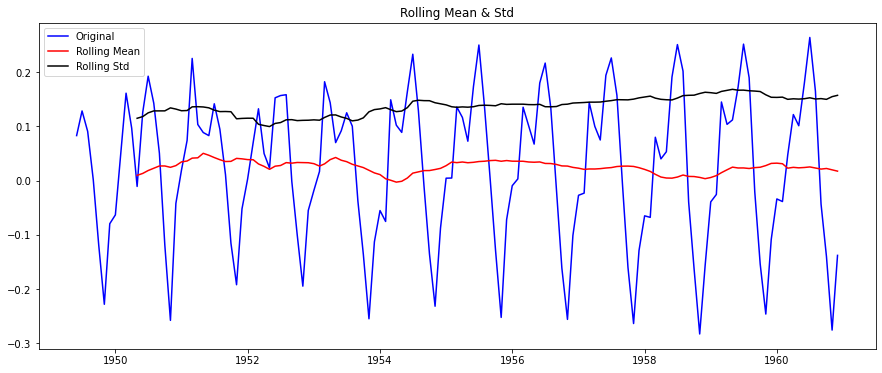

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [57]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
plot_rolling_statistics(ts_log_moving_avg_6)
augmented_dickey_fuller_test(ts_log_moving_avg_6)

window가 12일 때와 6일 때 다름을 알 수 있다. 

데이터가 월단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window size = 12가 적당하다는 것을 추측할 수 있다.

moving average를 고려할 때는 rolling mean을 구하기 위한 window의 크기를 결정하는 것이 매우 중요하다.

### 차분(Differencing) - Seasonality 상쇄하기
Trend에는 잡히지 않지만 패턴이 파악되지 않은 주기적 변화는 예측에 방해 되는 불안정성 요소이다.

Moving Average 제거로는 상쇄되지 않는 계절적, 주기적 패턴을 Seasonality 라고 한다.

=> 차분 : 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법
남은 것이 '현재 스텝 값 - 직전 스텝 값'이 되어, 정확히 이번 스텝에서 발생한 변화량을 의미함

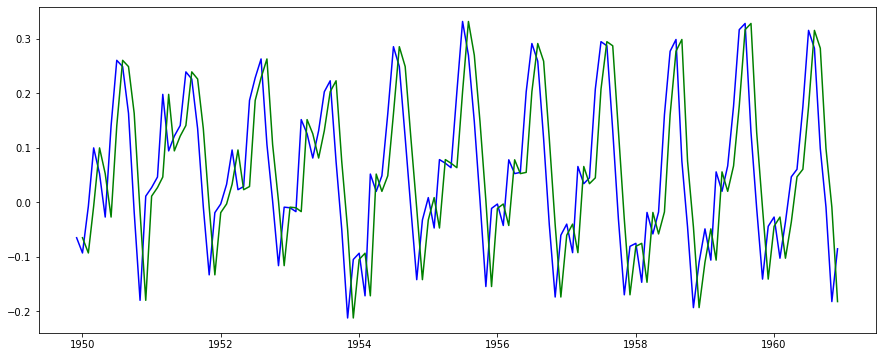

In [60]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color = "blue")
plt.plot(ts_log_moving_avg_shift, color = "green")

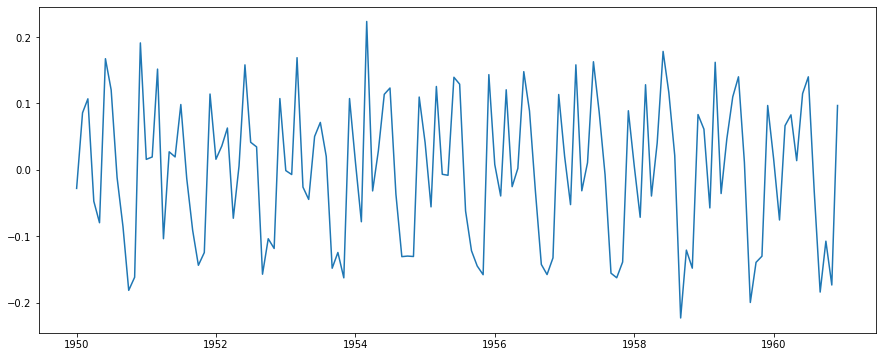

In [64]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

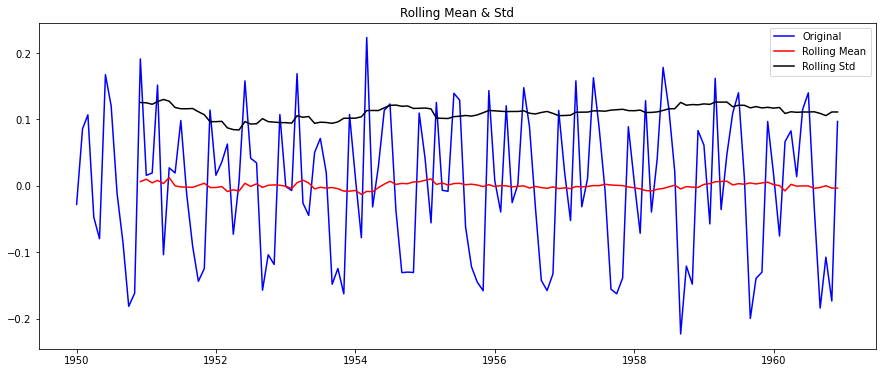

In [65]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [66]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


### 시계열 분해 (Time series decomposition) - trend, seasonality 직접 분리

Moving average 제거, 차분(differencing)을 거치지 않고도 훨씬 안정적인 시계열 분리 가능

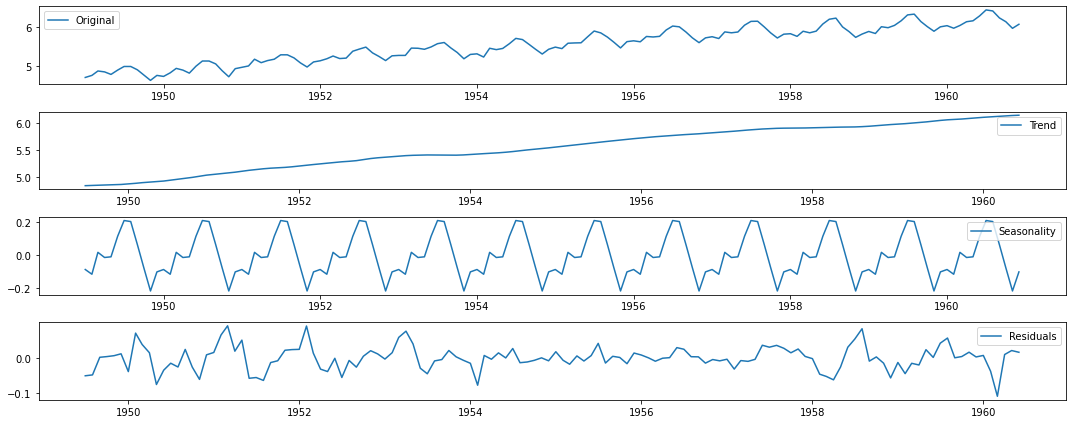

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

# Trend + Seasonality + Residual = Original
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

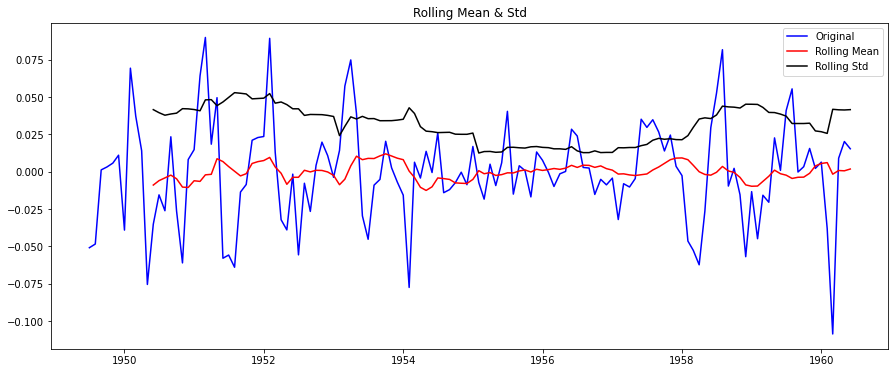

In [69]:
plot_rolling_statistics(residual)

In [70]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


# ARIMA 모델
- 시계열 데이터 예측모델을 자동으로 만들어주는 모델
- AR(Autoregressive) + I(Integrated) + MA(Moving Average)

### AR(자기회귀, Autoregressive)
- 자기 자신의 과거 데이터들을 변수로 하여, 자기 자신의 현재(혹은 미래를) 예측하는 모델을 자기회귀 모델이라고 한다.
- linear model처럼, 과거 데이터들에 가중치를 곱하여 합해준 값이 안정적 시계열의 값으로 수렴한다. (Residual 부분 모델링)
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점

### MA(이동평균, Moving Average)
- 현재의 예측 값이, 과거의 데이터의 예측 오차값의 가중합으로 수렴한다고 보는 모델
- Trend에 해당하는 부분을 모델링
- 예측오차값이 양수라면, 모델 예측보다 관측값이 더 높았다는 뜻이므로, 다음 예측시에 예측치를 올려서 예측하게 된다.
- 주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점

### I(차분누적, Integration)
- 현재의 예측 값이, 이전 데이터와 d차 차분의 누적 합이라고 보는 모델
- 예를 들어, d=1이라면 이전 데이터와 1차 차분의 누적이다.(1차만큼 움직인 데이터의 누적)
- Yt = Yt-1 + ΔYt-1
- Seasonality에 해당하는 부분을 모델링

=> 어제 주식값이 떨어졌다는 것을 알게 되었을 때, '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와 '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오르게 됩니다. ARIMA는 이 두 모델 사이에서 적정 가중치를 찾아가는 훨씬 통합적인 예측 능력을 보여 줍니다.

## ARIMA 모델의 parameter (p, d, q)

- p : 자기회귀 모형(AR)의 시차를 의미하는 p
- d : 차분(difference) 횟수를 의미하는 d
- q : 이동평균 모형(MA)의 시차를 의미하는 q
- p + q < 2, p * q = 0를 통상적으로 사용 (<=> p 나 q 중 하나의 값이 0이라는 뜻)
- 이렇게 하는 이유는 실제로 대부분의 시계열 데이터는 AR 이나 MA 중 하나의 경향만을 띠기 때문

### 적절한 p, d, q는 ACF와 PACF을 통해 결정
- ACF (Autocorrelation Function)  : 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
- PACF (Partial Autocorrelation Function) : 다른 관측치의 영향력은 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
- [참고자료](https://datascienceschool.net/view-notebook/8030f5931c1b4cf68a46c2a194b3a1c6/)
![relaton](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-4.max-800x600.png)

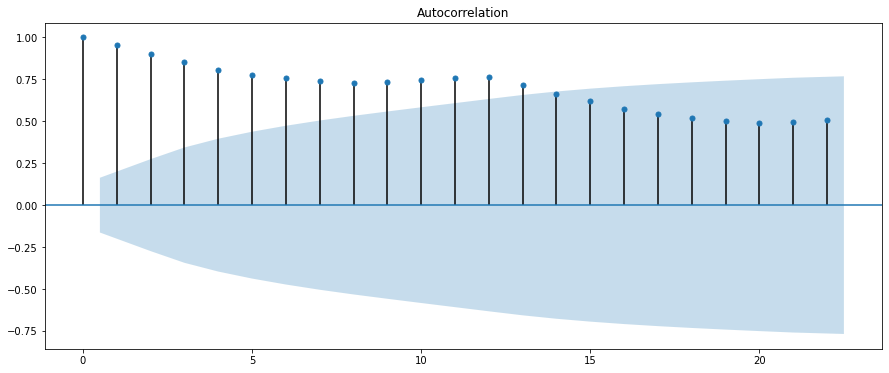

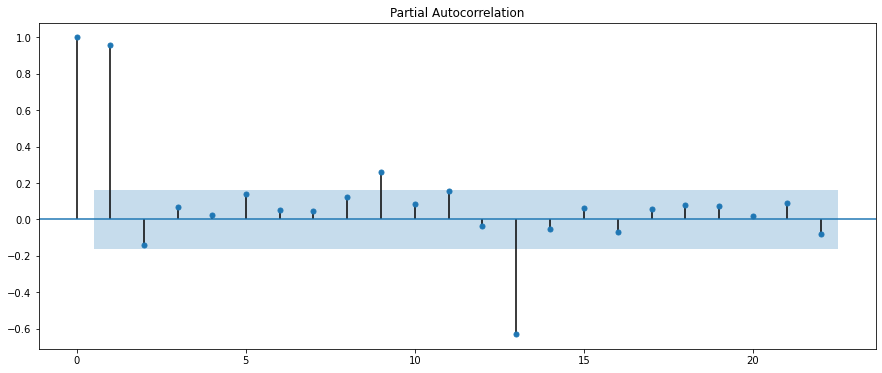

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()

ACF는 점차적으로 감소하고 있음 & PACF는 p=1 이후에 거의 0임
=> AR(1)

* PACF가 0이라는 의미 = 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다
* AR(1) 이고 MA는 고려할 필요가 없어 보이기 때문에 p=1, q=0으로 둘 수 있다.

d 구하는 방법

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


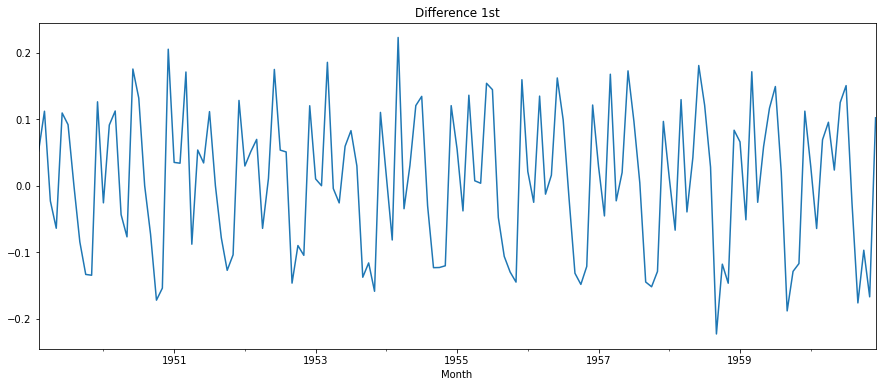

In [72]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


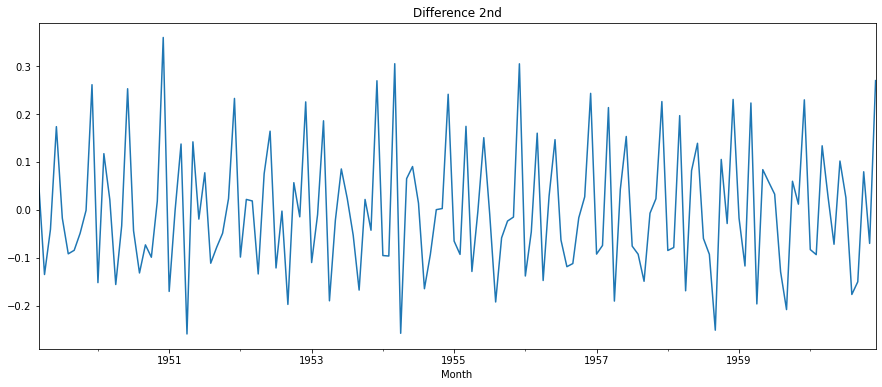

In [73]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 1차 차분은 애매한 수준의 안정화, 2차 차분일 때 확실히 안정화 상태
- 이번 경우에는 d=1로 먼저 시도해보고, d 값을 바꿔 가면서 최적의 값을 찾아볼 수 있음

### 학습 데이터 분리

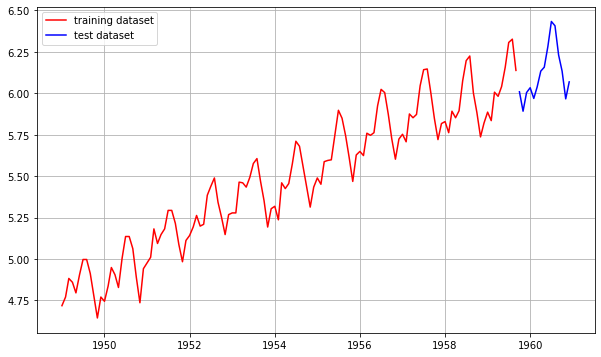

In [77]:
# 시계열 예측이기 때문에 가장 최신 데이터를 테스트용으로 사용하는 것이 타당하다
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [78]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


### ARIMA 모델 훈련

In [79]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) # p=1, d=1, q=0
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 108.023
Method:                       css-mle   S.D. of innovations              0.104
Date:                Thu, 13 Aug 2020   AIC                           -210.046
Time:                        16:38:49   BIC                           -201.490
Sample:                    02-01-1949   HQIC                          -206.570
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0108      0.011      0.972      0.331      -0.011       0.033
ar.L1.D.Passengers     0.1754      0.088      1.994      0.046       0.003       0.348
                    

/home/aiffel0035/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aiffel0035/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


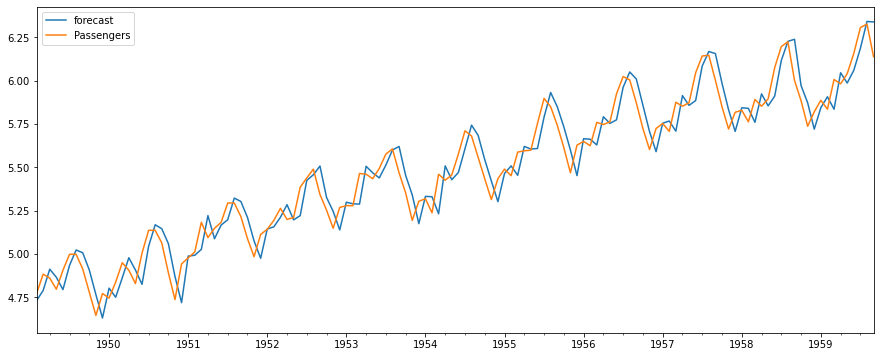

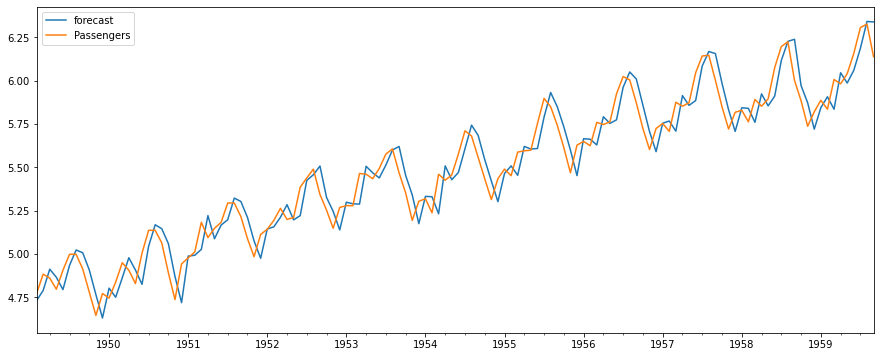

In [81]:
fitted_m.plot_predict() # train된 ARIMA 모델 시각화

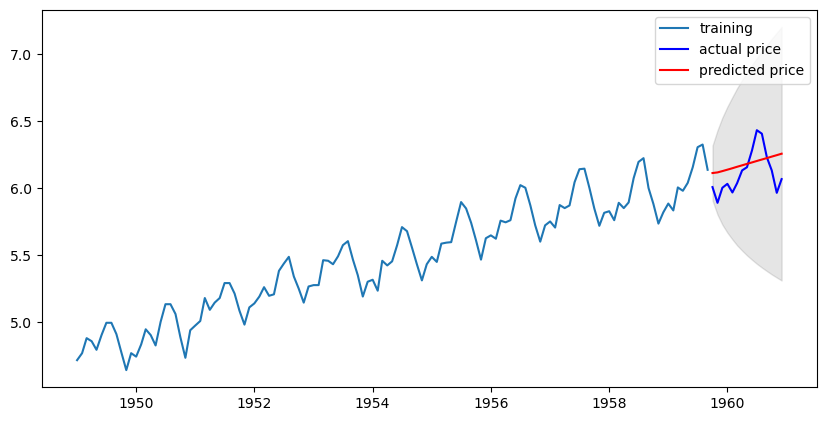

In [82]:
# 테스트 데이터 구간의 데이터 예측

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [85]:
# 최종 모델 오차율 계산
# 로그 변환힌 데이터를 지수 변환하여 원본의 스케일로 계산

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5409.54942893038
MAE:  63.1369176973685
RMSE:  73.54963921686074
MAPE: 14.08%


In [86]:
# 시계열 예측 모델의 메트릭으로 활용하기 적당한 MAPE 평가법 (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)
# q = 8일 경우, MAPE가 10% 정도, q = 12를 쓰면 더 좋은 결과일 것이라 예상하지만 데이터셋이 너무 작아 쓸 수 없음